In [7]:
import shutil, os
import pandas as pd
import statistics
import matplotlib.pyplot as plt
mLibDat = pd.read_csv("/mnt/c/Users/edeak/Mittleman_Timings_Paper.csv")
mLibDf = pd.DataFrame(mLibDat)

In [3]:
sTime = dict(zip(mLibDf.loc[:,'Instance'],zip(mLibDf.loc[:,'Total Time HiGHS'], mLibDf.loc[:,'Total Time'])))
creducs = dict(zip(mLibDf.loc[:,'Instance'], mLibDf.loc[:,'Column Reduction (%)']))
rreducs = dict(zip(mLibDf.loc[:,'Instance'], mLibDf.loc[:,'Row Reduction (%)']))
nreducs = dict(zip(mLibDf.loc[:,'Instance'], mLibDf.loc[:,'Nonzero Reduction (%)']))

In [121]:
plotPoints = {}
idx = 0
x = []
y = []
for key, val in sTime.items():
    if val[0] < 5: 
        continue
    gainloss = ((val[0] - val[1])/val[0])*100
    x.append(creducs[key])
    y.append(gainloss)

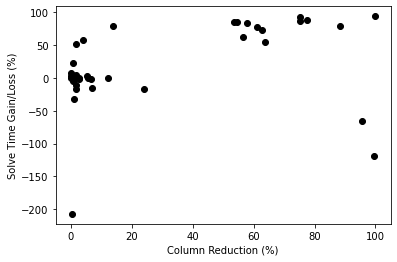

In [122]:
plt.scatter(x,y,c="black")
plt.xlabel("Column Reduction (%)")
plt.ylabel("Solve Time Gain/Loss (%)")
# plt.title("Solve Time Gain/Loss Compared to Column Reduction")
plt.savefig("colRed.png")

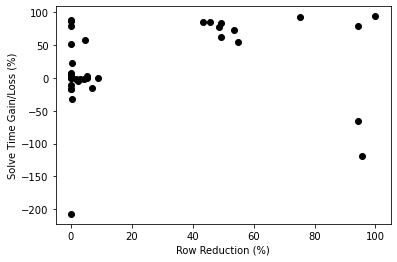

In [123]:
plotPoints = {}
idx = 0
x = []
y = []
for key, val in sTime.items():
    if val[0] < 5: 
        continue
    gainloss = ((val[0] - val[1])/val[0])*100
    x.append(rreducs[key])
    y.append(gainloss)
plt.scatter(x,y,c="black")
plt.xlabel("Row Reduction (%)")
plt.ylabel("Solve Time Gain/Loss (%)")
# plt.title("Solve Time Gain/Loss Compared to Row Reduction")
plt.savefig("rowRed.png")

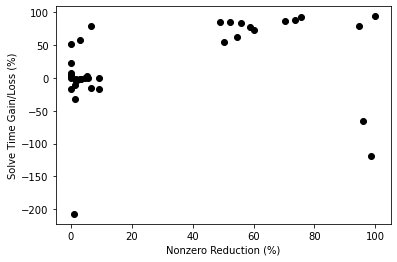

In [124]:
plotPoints = {}
idx = 0
x = []
y = []
for key, val in sTime.items():
    if val[0] < 5: 
        continue
    gainloss = ((val[0] - val[1])/val[0])*100
    x.append(nreducs[key])
    y.append(gainloss)
plt.scatter(x,y,c="black")
plt.xlabel("Nonzero Reduction (%)")
plt.ylabel("Solve Time Gain/Loss (%)")
# plt.title("Solve Time Gain/Loss Compared to Nonzero Reduction")
plt.savefig("nnzRed.png")

In [125]:
cnt1 = 0
cnt2 = 0
cnt3 = 0
for key, val in sTime.items():
    cnt3 += 1
    if val[0] < 5:
        continue
    if (val[0] < val[1]):
        cnt2 += 1
    else:
        cnt1 += 1
print(cnt1,cnt2,cnt1 + cnt2, cnt3)

20 16 36 159


In [138]:
percent = []
cnt = 0
for key, val in sTime.items():
    if val[0] >= 5:
        if val[0] < val[1]:
            percent.append(nreducs[key])
print(statistics.mean(percent), cnt)

15.16625 0


In [9]:
cnt = 0
for key, vals in sTime.items():
    if vals[0] > 5:
        file = "../EQLPSolver/mittleman_symmetric_mps/%s" % key
        dire = "../EQLPSolver/mittleman_symmetric_5/"
        shutil.copy(file, dire)